# Street Easy

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Columns;

- `rental_id`: rental ID
- `rent`: price of rent in dollars
- `bedrooms`: number of bedrooms
- `bathrooms`: number of bathrooms
- `size_sqft`: size in square feet
- `min_to_subway`: distance from subway station in minutes
- `floor`: floor number
- `building_age_yrs`: building’s age in years
- `no_fee`: does it have a broker fee? (0 for fee, 1 for no fee)
- `has_roofdeck`: does it have a roof deck? (0 for no, 1 for yes)
- `has_washer_dryer`: does it have washer/dryer in unit? (0/1)
- `has_doorman`: does it have a doorman? (0/1)
- `has_elevator`: does it have an elevator? (0/1)
- `has_dishwasher`: does it have a dishwasher (0/1)
- `has_patio`: does it have a patio? (0/1)
- `has_gym`: does the building have a gym? (0/1)
- `neighborhood`: (ex: Greenpoint)
- `borough`: (ex: Brooklyn)

In [5]:
df = pd.read_csv("Data/manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Need to split our data

- Training Set - the data used to fit the model
- Test Set - the data partitioned away to provide unbiased evaluation of the model

Allocating 20%/80% Test/Training is a good place to start

In [6]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
        'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

def shape(dataframe):
        args = locals()
        return print(dataframe.shape)

print("Training Data")
shape(x_train)
shape(y_train)

print("\nTest Data")
shape(x_test)
shape(y_test)

Training Data
(2831, 14)
(2831, 1)

Test Data
(708, 14)
(708, 1)


## Building Linear Regression Model

In [8]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [9]:
y_predict = lm.predict(x_test)

Lets test it on [Sonny's Apartment](https://streeteasy.com/rental/2177438)

Features	Sonny’s Apartment

bedrooms	1
bathrooms	1
size_sqft	620 ft²
min_to_subway	16 min
floor	1
building_age_yrs	98 (built in 1920)
no_fee	1
has_roofdeck	0
has_washer_dryer	Yas
has_doorman	0
has_elevator	0
has_dishwasher	1
has_patio	1
has_gym	0

In [10]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict = lm.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


/Users/Ian/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


----
### 2D Graphs

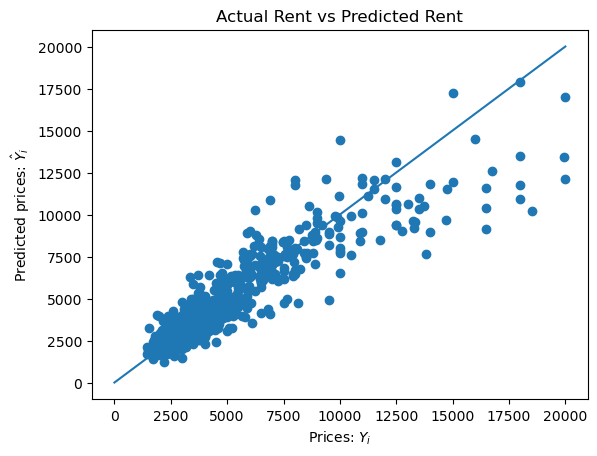

In [11]:
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

----
#### Multiple Linear Regression Equation

$$y=b+m_1x_1+m_2x_2+...+m_nx_n$$

In [12]:
print(F"Coefficients:\n{lm.coef_}")

Coefficients:
[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In Manhattan model, there are 14 variables hence 14 coefficients

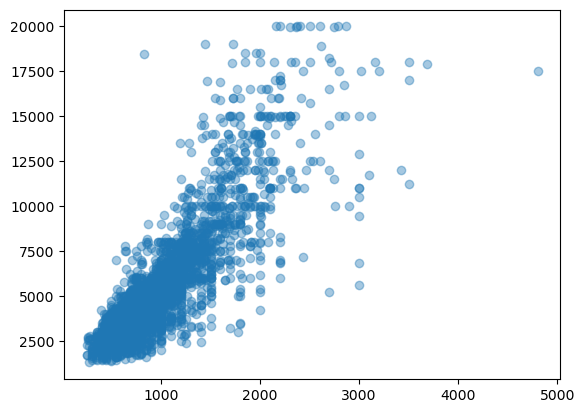

In [13]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

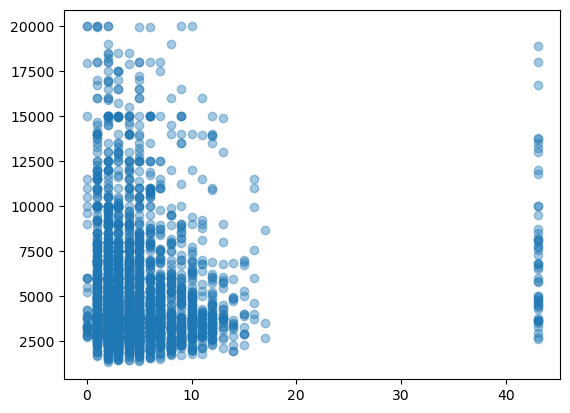

In [14]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.show()

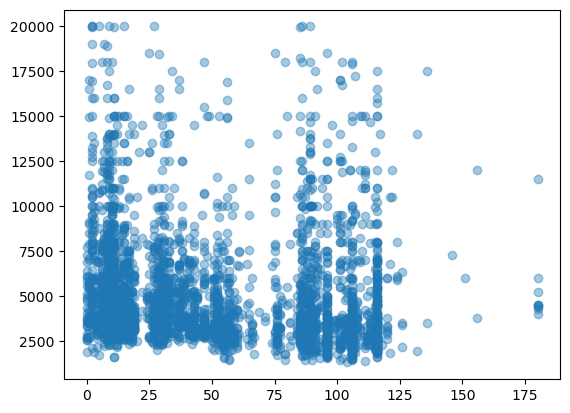

In [15]:
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

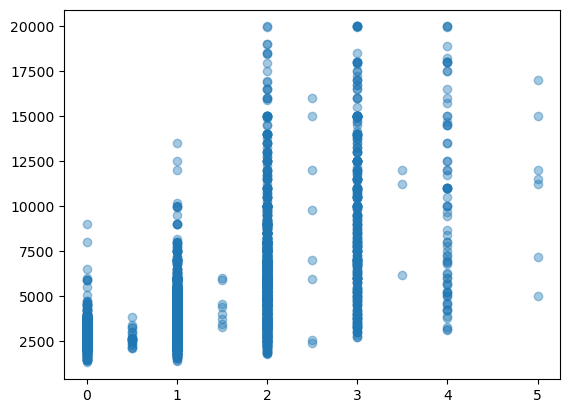

In [16]:
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.show()

----
### Evaluating the model's accuracy

Residual analysis

$$e=y-\hat{y}$$

where:

- $y$ is actual rent
- $\hat{y}$ is the predicted rent

In [17]:
print("Train score:")
print(lm.score(x_train, y_train))

Train score:
0.7725460559817883


In [18]:
print("Test score:")
print(lm.score(x_test, y_test))

Test score:
0.8050371975357635


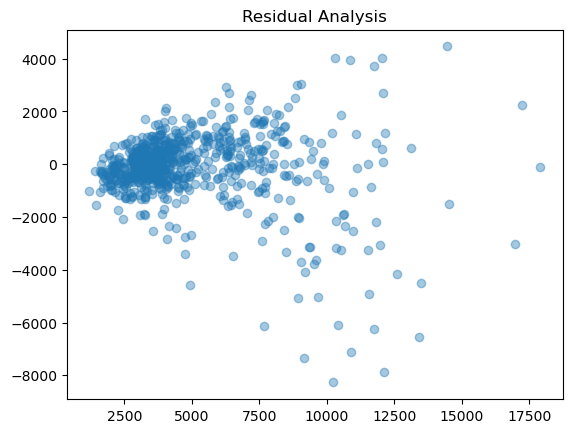

In [19]:
residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()